# Part I - (Loan Data Exploration)
## by Lan Nguyen

## I. Introduction

We have an original dataset about loan from Prosper containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In the realm of financial analysis, univariate, bivariate, and multivariate examinations of data provide insightful perspectives into the dynamics of lending practices and borrower behaviors. This study delves into a comprehensive analysis of loan terms, Annual Percentage Rates (APR), Prosper Scores, employment statuses, and borrower categories in the context of a lending platform. The data under scrutiny presents a multifaceted view of borrowing trends, revealing intricate relationships between various factors that influence lending decisions.



## II. Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

### 1. Load in data


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### 2.  What is the structure of your dataset?

In [3]:
df.shape

(113937, 81)

The data have up to 81 columns and more than 100k records

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### 3. What is/are the main feature(s) of interest in your dataset?

From the provided information, the main features of interest in the dataset include:

- Loan Terms: The different loan term options (12 months, 36 months, and 60 months) offered by Prosper are a crucial feature to understand borrower preferences and lending trends.

- Annual Percentage Rate (APR): The distribution and patterns of APR provide insights into the cost of borrowing for different borrowers and loan terms, shedding light on the interest rates charged to borrowers.

- Prosper Scores: The Prosper Scores, which range from 1 to 10, serve as a measure of borrower creditworthiness. Analyzing the distribution of scores and their correlation with other variables can uncover the platform's risk assessment strategies.

- Employment Status: The various employment statuses provide valuable information about the financial stability and capacity of borrowers to repay loans. This feature can influence loan terms and interest rates.

- Borrower Categories: Understanding the distribution of borrowers among different categories, such as "other," "professional," and "student," can provide insights into the demographics of the borrower population and their borrowing motivations.

- Loan Status: Analyzing the distribution of loan statuses, such as "current" and "completed," offers insights into borrowers' repayment behaviors and overall loan fulfillment rates.

- Purpose of Loans: Exploring the purposes for which loans are being taken out, such as debt consolidation, cosmetic procedures, or adoption, can help in understanding the financial needs and motivations of borrowers.

These features collectively form the core aspects of the dataset that are of interest for analysis, as they offer insights into borrower behavior, lending practices, credit assessment, and loan fulfillment dynamics within the Prosper lending platform.

### 4. What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Multiple columns like: [ListingCreationDate, ListingCategory, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, EmploymentStatus, EmploymentStatusDuration, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, OnTimeProsperPayments, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding] will help me to investigate into the features of interest.

## II. Data Processing

### Data Assessing and Cleaning
- Choose subset of features important
- Convert listing category numeric to string
- Check and fill missing value
- removed rows without ProsperRating
- Create year and month columns from ListingCreationDate
- Remove redundant columns

In [5]:
# Keep the necessary columns
df_selected = df[['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerAPR', 'Term', 'LoanStatus', 'ProsperScore',
                  'ProsperRating (Alpha)', 'EmploymentStatus', 'Occupation', 'StatedMonthlyIncome']]
df_selected.head()

,ListingCreationDate,ListingCategory (numeric),BorrowerAPR,Term,LoanStatus,ProsperScore,ProsperRating (Alpha),EmploymentStatus,Occupation,StatedMonthlyIncome
0,2007-08-26 19:09:29.263000000,0,0.16516,36,Completed,NaN,NaN,Self-employed,Other,3083.333333
1,2014-02-27 08:28:07.900000000,2,0.12016,36,Current,7.0,A,Employed,Professional,6125.000000
2,2007-01-05 15:00:47.090000000,0,0.28269,36,Completed,NaN,NaN,Not available,Other,2083.333333
3,2012-10-22 11:02:35.010000000,16,0.12528,36,Current,9.0,A,Employed,Skilled Labor,2875.000000
4,2013-09-14 18:38:39.097000000,2,0.24614,36,Current,4.0,D,Employed,Executive,9583.333333


In [6]:
'''This cell is to map the listing category from nummeric to text to easy to get the meaning for later analysis'''

# Mapping dictionary
numeric_to_text = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}

# Mapping the numeric values to text labels and creating a new column
df_selected['ListingCategory'] = df_selected['ListingCategory (numeric)'].map(numeric_to_text)
df_selected.head()

,ListingCreationDate,ListingCategory (numeric),BorrowerAPR,Term,LoanStatus,ProsperScore,ProsperRating (Alpha),EmploymentStatus,Occupation,StatedMonthlyIncome,ListingCategory
0,2007-08-26 19:09:29.263000000,0,0.16516,36,Completed,NaN,NaN,Self-employed,Other,3083.333333,Not Available
1,2014-02-27 08:28:07.900000000,2,0.12016,36,Current,7.0,A,Employed,Professional,6125.000000,Home Improvement
2,2007-01-05 15:00:47.090000000,0,0.28269,36,Completed,NaN,NaN,Not available,Other,2083.333333,Not Available
3,2012-10-22 11:02:35.010000000,16,0.12528,36,Current,9.0,A,Employed,Skilled Labor,2875.000000,Motorcycle
4,2013-09-14 18:38:39.097000000,2,0.24614,36,Current,4.0,D,Employed,Executive,9583.333333,Home Improvement


In [7]:
def modify_loan_status(status):
    if "Past Due" in status:
        return "Past Due"
    else:
        return status

df_selected['LoanStatus'] = df_selected['LoanStatus'].apply(modify_loan_status)

In [8]:
df_selected.isna().mean()

ListingCreationDate          0.000000
ListingCategory (numeric)    0.000000
BorrowerAPR                  0.000219
Term                         0.000000
LoanStatus                   0.000000
ProsperScore                 0.255264
ProsperRating (Alpha)        0.255264
EmploymentStatus             0.019792
Occupation                   0.031491
StatedMonthlyIncome          0.000000
ListingCategory              0.000000
dtype: float64

In [9]:
# Remove the records do not have Prosper Score
df_selected = df_selected[~df_selected['ProsperScore'].isna()]

In [10]:
df_selected.isna().mean()

ListingCreationDate          0.00000
ListingCategory (numeric)    0.00000
BorrowerAPR                  0.00000
Term                         0.00000
LoanStatus                   0.00000
ProsperScore                 0.00000
ProsperRating (Alpha)        0.00000
EmploymentStatus             0.00000
Occupation                   0.01571
StatedMonthlyIncome          0.00000
ListingCategory              0.00000
dtype: float64

In [11]:
# fill null for Occupation
df_selected['Occupation'] = df_selected['Occupation'].fillna('Missing')

In [12]:
# Process the Listing Creation Date
df_selected['CreationYear'] = df_selected['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_selected['CreationMonth'] = df_selected['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)
df_selected.head()

,ListingCreationDate,ListingCategory (numeric),BorrowerAPR,Term,LoanStatus,ProsperScore,ProsperRating (Alpha),EmploymentStatus,Occupation,StatedMonthlyIncome,ListingCategory,CreationYear,CreationMonth
1,2014-02-27 08:28:07.900000000,2,0.12016,36,Current,7.0,A,Employed,Professional,6125.000000,Home Improvement,2014,02
3,2012-10-22 11:02:35.010000000,16,0.12528,36,Current,9.0,A,Employed,Skilled Labor,2875.000000,Motorcycle,2012,10
4,2013-09-14 18:38:39.097000000,2,0.24614,36,Current,4.0,D,Employed,Executive,9583.333333,Home Improvement,2013,09
5,2013-12-14 08:26:37.093000000,1,0.15425,60,Current,10.0,B,Employed,Professional,8333.333333,Debt Consolidation,2013,12
6,2013-04-12 09:52:56.147000000,1,0.31032,36,Current,2.0,E,Employed,Sales - Retail,2083.333333,Debt Consolidation,2013,04


In [13]:
df_selected.drop(columns=['ListingCreationDate', 'ListingCategory (numeric)'], inplace=True)
df_selected.head()

,BorrowerAPR,Term,LoanStatus,ProsperScore,ProsperRating (Alpha),EmploymentStatus,Occupation,StatedMonthlyIncome,ListingCategory,CreationYear,CreationMonth
1,0.12016,36,Current,7.0,A,Employed,Professional,6125.000000,Home Improvement,2014,02
3,0.12528,36,Current,9.0,A,Employed,Skilled Labor,2875.000000,Motorcycle,2012,10
4,0.24614,36,Current,4.0,D,Employed,Executive,9583.333333,Home Improvement,2013,09
5,0.15425,60,Current,10.0,B,Employed,Professional,8333.333333,Debt Consolidation,2013,12
6,0.31032,36,Current,2.0,E,Employed,Sales - Retail,2083.333333,Debt Consolidation,2013,04


## III. Univariate Exploration


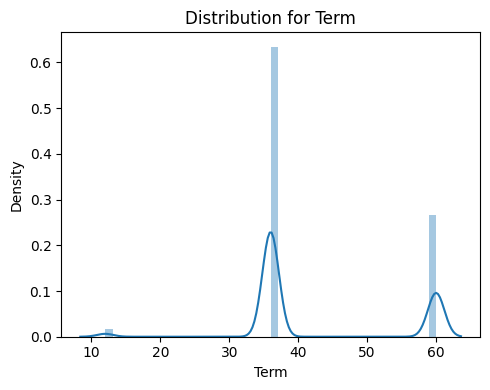

In [14]:
plt.figure(figsize=(5,4))
sb.distplot(df_selected['Term'])
plt.title('Distribution for Term')
plt.tight_layout()

- There are three types of loan terms offered by Prosper: 12 months, 36 months, and 60 months. Among these, the 36-month term accounts for the majority of loans, while the 12-month term is significantly less common compared to the other two options.

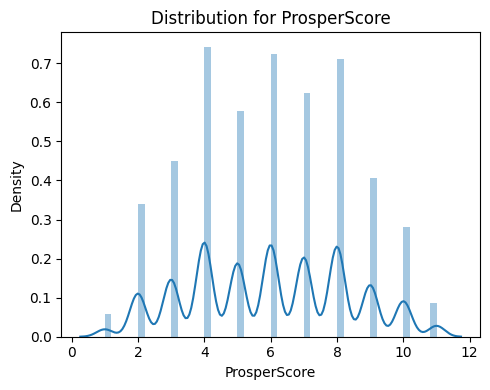

In [15]:

plt.figure(figsize=(5,4))
sb.distplot(df_selected['ProsperScore'])
plt.title('Distribution for ProsperScore')
plt.tight_layout()


- The Prosper Score, which ranges from 1 to 10, shows varying frequencies among the different score levels. Most loans have Prosper Scores of 4, 6, or 8.

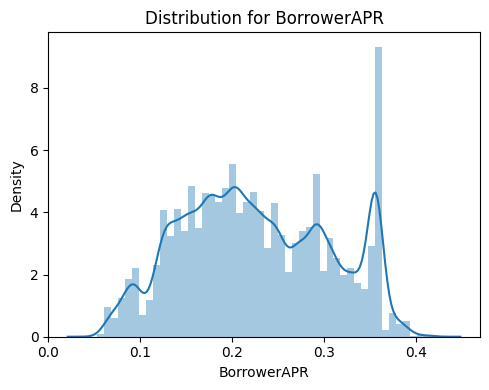

In [16]:
plt.figure(figsize=(5,4))
sb.distplot(df_selected['BorrowerAPR'])
plt.title('Distribution for BorrowerAPR')
plt.tight_layout()

- The distribution of Annual Percentage Rate (APR) appears to be multimodal. There are small peaks centered around 0.1 and 0.3, a larger peak centered around 0.2, and a distinct, sharp peak between 0.35 and 0.36. It is worth noting that only a very few loans have APR values greater than 0.43.


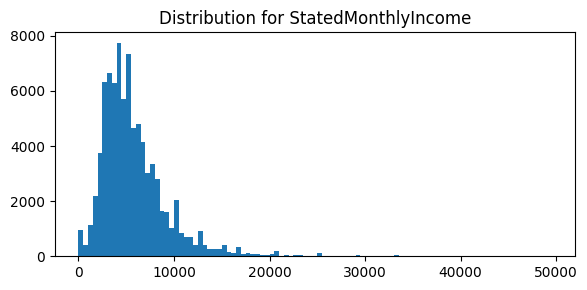

In [17]:
plt.figure(figsize=(6,3))
bins = np.arange(0, 50000, 500)
plt.hist(data=df_selected, x= 'StatedMonthlyIncome', bins = bins)
plt.title("Distribution for StatedMonthlyIncome")
plt.tight_layout()

Analysis:

- The distribution of stated monthly income is heavily skewed to the right, with the majority of incomes falling below 30k. The peak of the distribution occurs around 6k, indicating that a significant number of borrowers have a monthly income in this range.

- However, it is important to note the presence of outliers at around 100k and 50k, which appear to be significantly higher than the rest of the data. These outliers should be carefully examined and, if necessary, removed to ensure a more accurate representation of the income distribution.

In [18]:
df_selected = df_selected[df_selected['StatedMonthlyIncome']<30000]

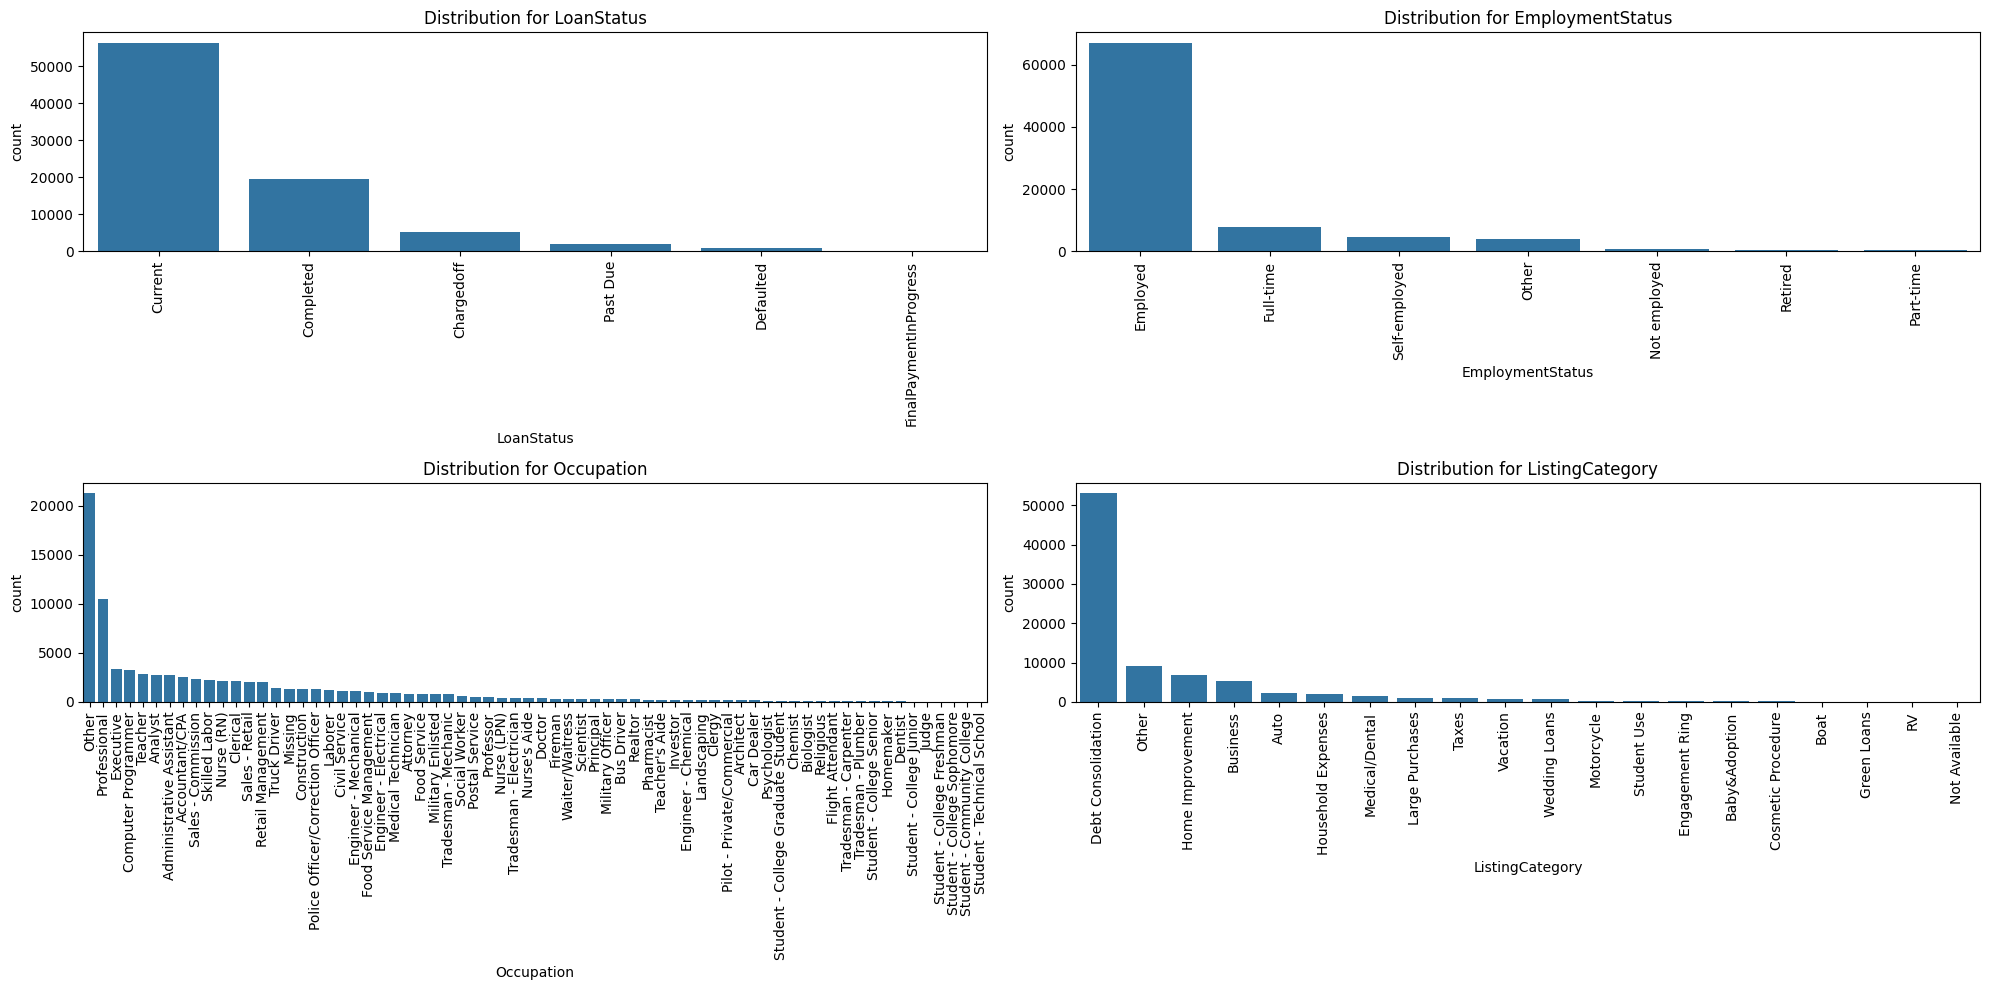

In [19]:
text_col_to_uni_explore = ['LoanStatus', 'EmploymentStatus', 'Occupation', 'ListingCategory']
default_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
for n,col in enumerate(text_col_to_uni_explore):
    plt.subplot(2,2,n+1)
    counts = df_selected[col].value_counts().sort_values(ascending=False)
    sb.countplot(data=df_selected, x=col, order=counts.index, color=default_color)
    plt.title("Distribution for {}".format(col))
    plt.xticks(rotation=90)
    plt.tight_layout()

Key Findings:

- Loan Status: The majority of borrowers are diligently repaying their loans, as most of the loans are marked as "current." Additionally, a significant number of loans have been successfully completed, indicating a positive track record of loan fulfillment.

- Employment Status: A substantial 80% of borrowers are employed, highlighting a reliable and stable source of income among the applicants. This factor contributes to the lenders' confidence in the borrowers' ability to repay the loans.

- Borrower Categories: The two largest borrower groups are individuals classified as "other" and "professional." On the contrary, students represent the smallest segment among the borrower categories, suggesting that the loan applicants are primarily working professionals.

- Loan Purposes: Debt consolidation emerges as the most prevalent reason for borrowing, indicating that many borrowers seek to manage and streamline their existing debts. Conversely, loan applications for cosmetic procedures, baby adoption, and engagement rings are relatively infrequent, suggesting that these specific purposes are less common motivations for taking out loans.

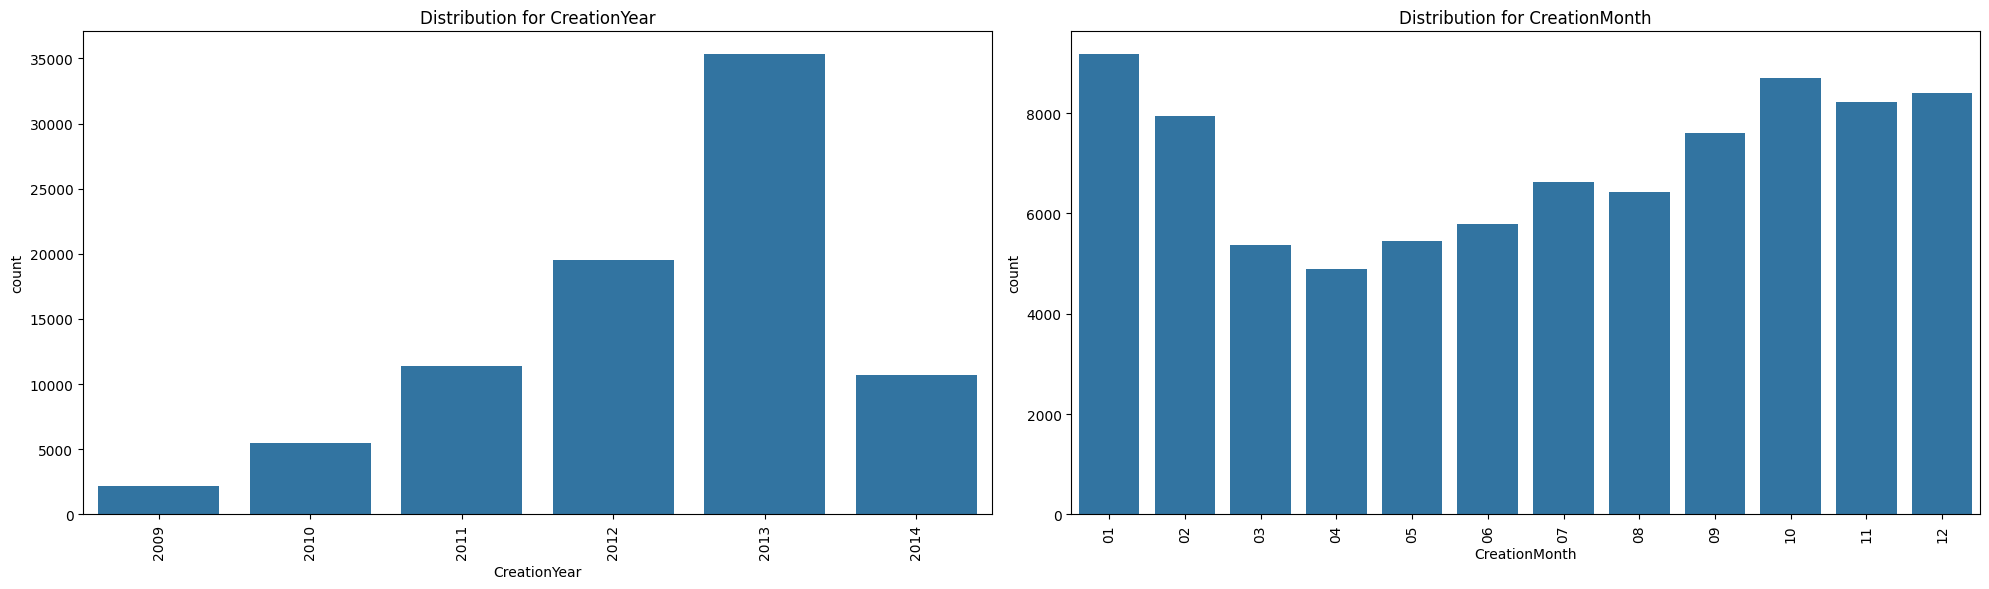

In [20]:
text_col_to_uni_explore = ['CreationYear',	'CreationMonth']
default_color = sb.color_palette()[0]
plt.figure(figsize=(20,6))
for n,col in enumerate(text_col_to_uni_explore):
    plt.subplot(1,2,n+1)
    counts = df_selected[col].value_counts().sort_index()
    sb.countplot(data=df_selected, x=col, order=counts.index, color=default_color)
    plt.title("Distribution for {}".format(col))
    plt.xticks(rotation=90)
    plt.tight_layout()

Observations:

- Over the years, the number of listings has shown a consistent upward trend, except for the year 2014, where complete data is not available. This growth in listings indicates a growing demand for loans over time.

- The loan applications tend to cluster around specific periods within each year. We observe higher activity in the beginning of the year, particularly in January and February, possibly indicating a higher need for financial assistance after the holiday season. Additionally, there is another surge in loan applications during the last half of the year, from September to December. This pattern could be attributed to various factors, such as year-end expenses, holiday preparations, or financial planning for the upcoming new year.

## IV. Bivariate Exploration

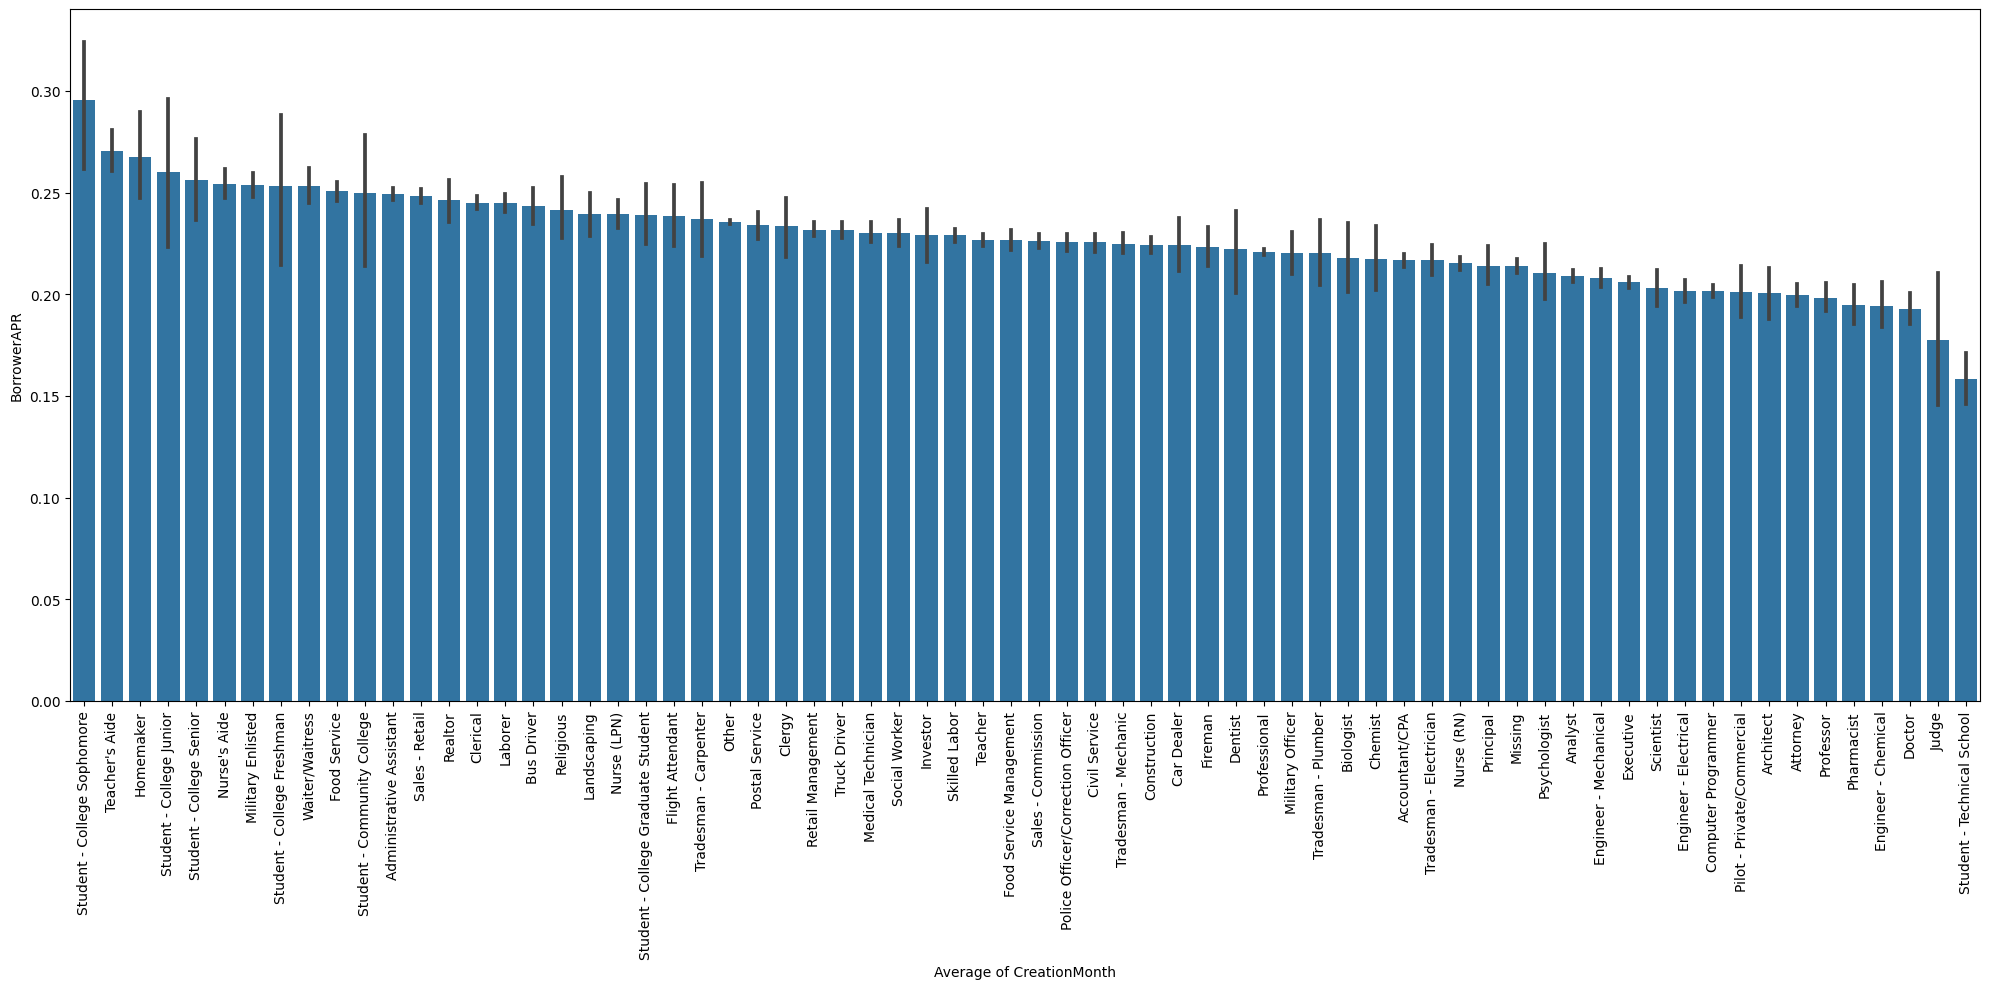

In [21]:
# plotting
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
means = df_selected.groupby('Occupation')['BorrowerAPR'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = df_selected, x = 'Occupation', y = 'BorrowerAPR',
        color = base_color, order = order)
plt.xlabel('Average of {}'.format(col))
plt.xticks(rotation=90)
plt.tight_layout()


Borrower APR Analysis:

- Among different borrower categories, College Sophomores who are students have the highest Borrower APR, indicating that they generally face higher interest rates on their loans. Following closely are Teacher's Aides and Homemakers, who also tend to have relatively higher APRs.

- On the other hand, borrowers categorized as Student - Technical School have the lowest Borrower APR, implying that they typically enjoy more favorable interest rates on their loans. Additionally, Judges and Doctors are among the borrower categories with comparably lower APRs.

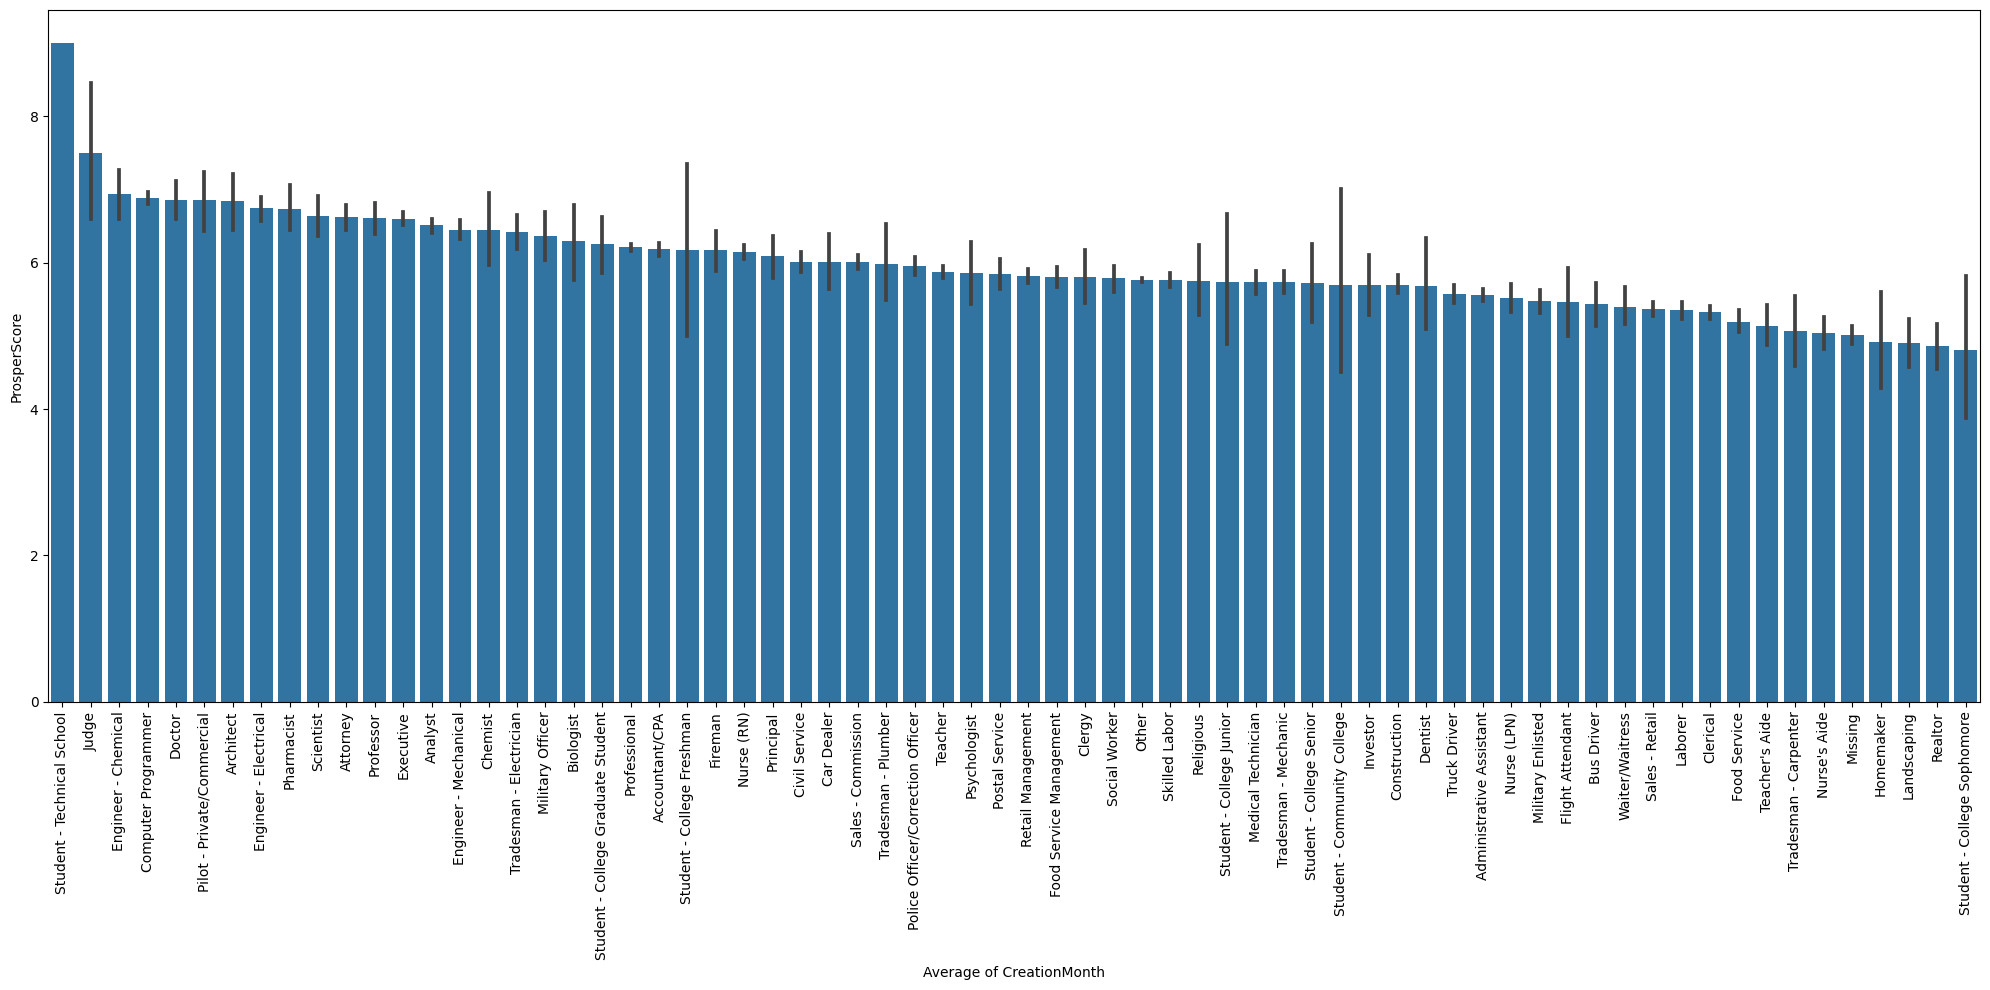

In [22]:
# plotting
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
means = df_selected.groupby('Occupation')['ProsperScore'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = df_selected, x = 'Occupation', y = 'ProsperScore',
        color = base_color, order = order)
plt.xlabel('Average of {}'.format(col))
plt.xticks(rotation=90)
plt.tight_layout()


Prosper Score Analysis:

- Surprisingly, borrowers categorized as Student - Technical School exhibit the highest Prosper Scores, indicating that they are perceived as more creditworthy and financially stable. Following closely are Judges and Engineers - Chemical, who also have relatively high Prosper Scores.

- Conversely, borrowers identified as Student - College Sophomores have the lowest Prosper Scores, suggesting that they might be perceived as having a higher risk profile. Next in line are Realtors and individuals in the Landscaping industry, who also have comparatively lower Prosper Scores.

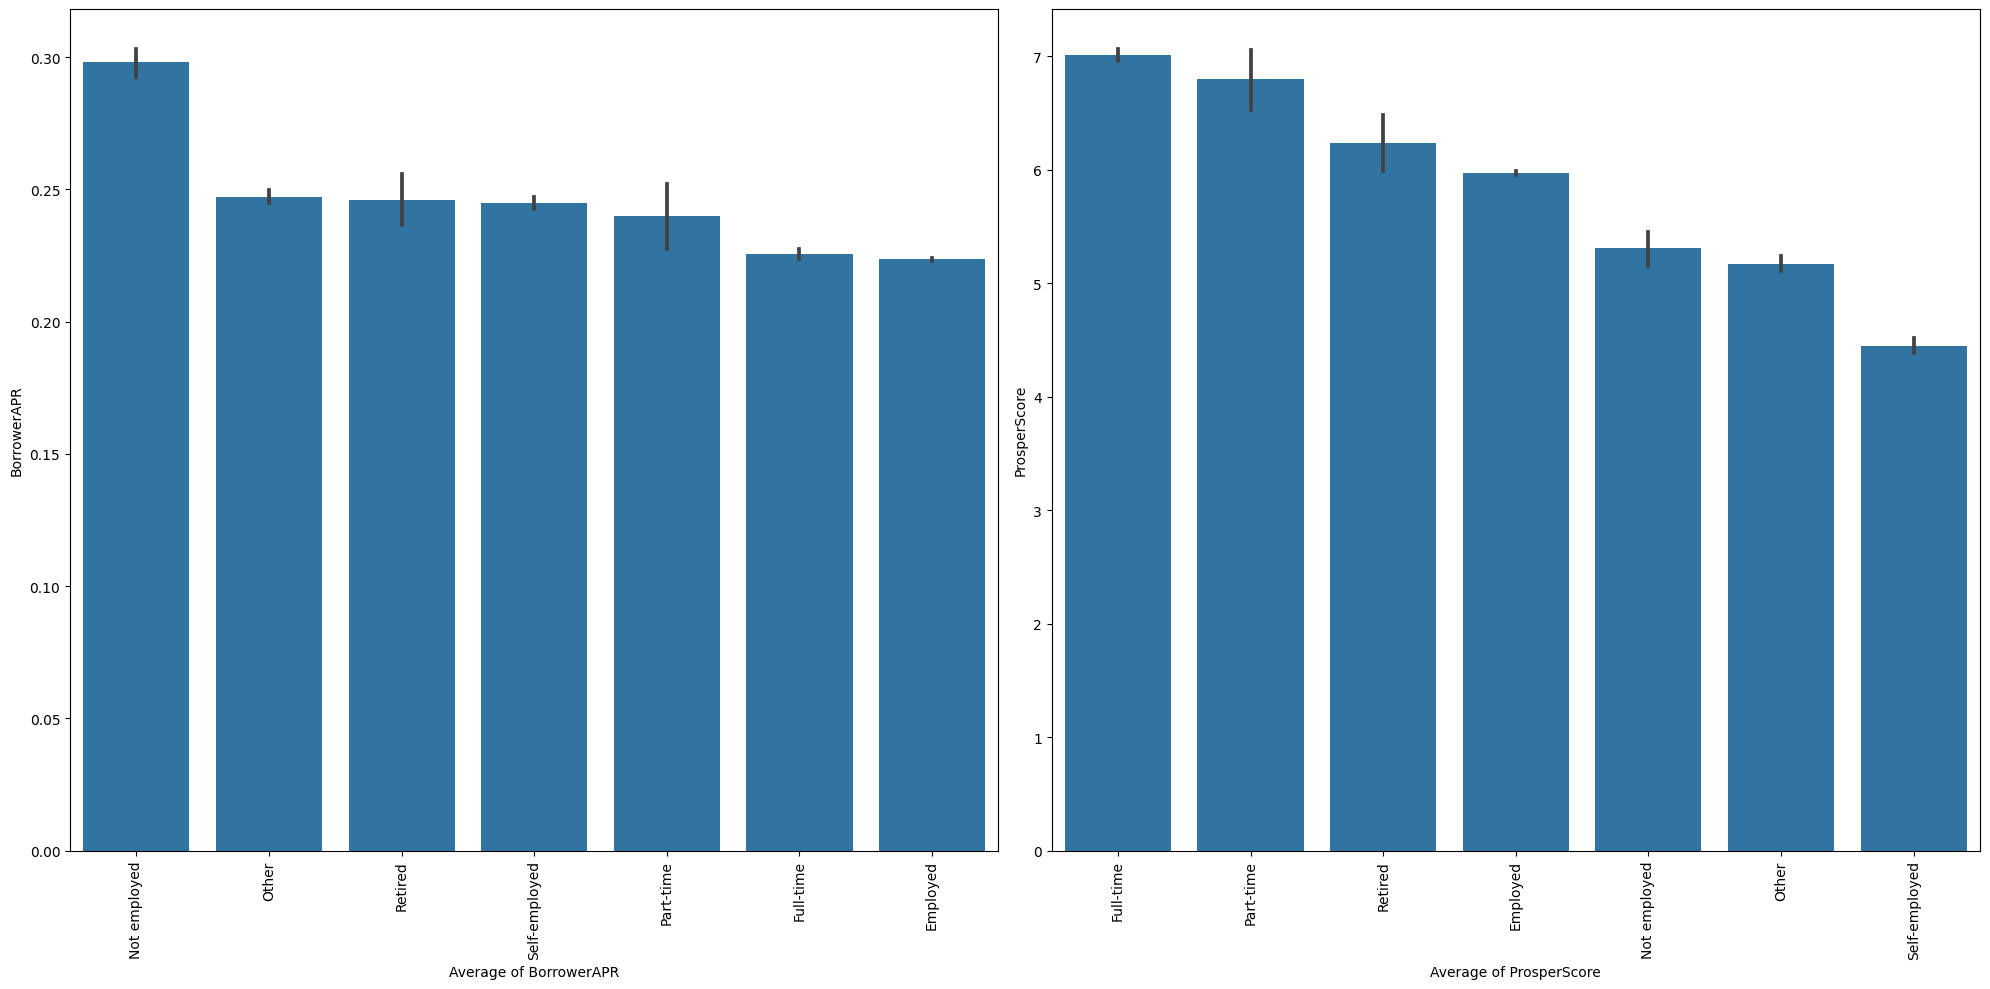

In [23]:
# plotting
cols = ['BorrowerAPR', 'ProsperScore']
plt.figure(figsize=(20,10))
for n, col in enumerate(cols):
    base_color = sb.color_palette()[0]
    plt.subplot(1,2,n+1)
    means = df_selected.groupby('EmploymentStatus')[col].mean()
    order = means.sort_values(ascending = False).index
    sb.barplot(data = df_selected, x = 'EmploymentStatus', y = col,
            color = base_color, order = order)
    plt.xlabel('Average of {}'.format(col))
    plt.xticks(rotation=90)
    plt.tight_layout()


Observations:

- Self-Employed Borrowers: Among the various employment categories, self-employed borrowers have the lowest Prosper Scores. Despite this, they have relatively higher Borrower APRs compared to other employment groups. This suggests that self-employed individuals might be perceived as higher-risk borrowers, leading to higher interest rates on their loans.

- Not Employed Borrowers: Similar to self-employed borrowers, those categorized as "not employed" also exhibit the lowest Prosper Scores. Despite their lack of employment, they have relatively higher Borrower APRs. This indicates that individuals without current employment may face challenges in obtaining favorable loan terms, resulting in higher interest rates on their loans.

The observations highlight the impact of employment status on both Prosper Scores and Borrower APRs, indicating that employment plays a crucial role in loan assessments and interest rate determination.

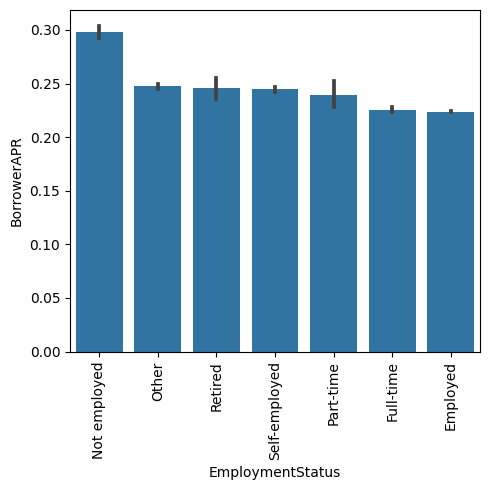

In [24]:
# plotting
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[0]
means = df_selected.groupby('EmploymentStatus')['BorrowerAPR'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = df_selected, x = 'EmploymentStatus', y = 'BorrowerAPR',
        color = base_color, order = order)
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=90)
plt.tight_layout()


- Self-Employed Borrowers: Among the various employment categories, self-employed borrowers have the lowest Prosper Scores. Despite this, they have relatively higher Borrower APRs compared to other employment groups. This suggests that self-employed individuals might be perceived as higher-risk borrowers, leading to higher interest rates on their loans.

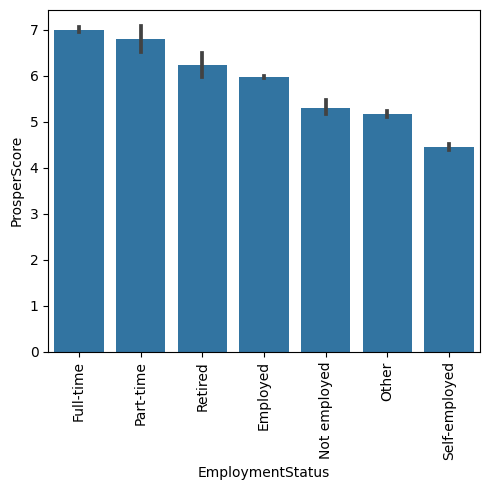

In [25]:
# plotting
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[0]
means = df_selected.groupby('EmploymentStatus')['ProsperScore'].mean()
order = means.sort_values(ascending = False).index
sb.barplot(data = df_selected, x = 'EmploymentStatus', y = 'ProsperScore',
        color = base_color, order = order)
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=90)
plt.tight_layout()


- Not Employed Borrowers: Similar to self-employed borrowers, those categorized as "not employed" also exhibit the lowest Prosper Scores. Despite their lack of employment, they have relatively higher Borrower APRs. This indicates that individuals without current employment may face challenges in obtaining favorable loan terms, resulting in higher interest rates on their loans.

The observations highlight the impact of employment status on both Prosper Scores and Borrower APRs, indicating that employment plays a crucial role in loan assessments and interest rate determination.

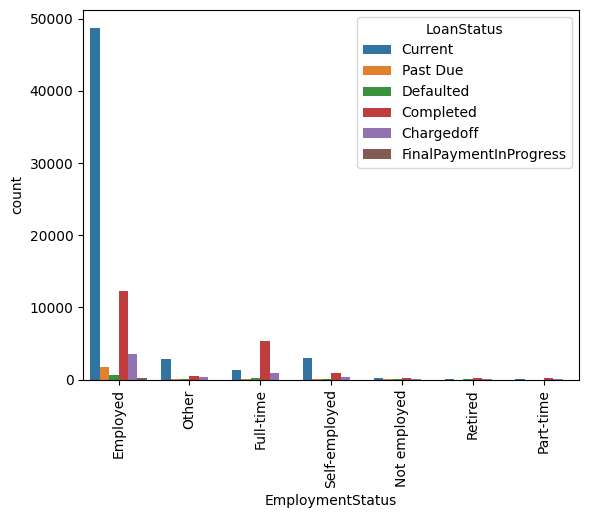

In [26]:
sb.countplot(data=df_selected, x='EmploymentStatus', hue='LoanStatus')
plt.xticks(rotation=90);

Observations:

- Among the "Employed" and "Other" borrower groups, the majority of loans are in the "Current" status, indicating that most borrowers in these categories are actively repaying their loans.

- Conversely, in the "Full Time," "Self-Employed," "Not Employed," "Retire," and "Part Time" borrower groups, the highest percentage of loans is in the "Completed" status. This suggests that borrowers in these categories have successfully fulfilled their loan obligations.

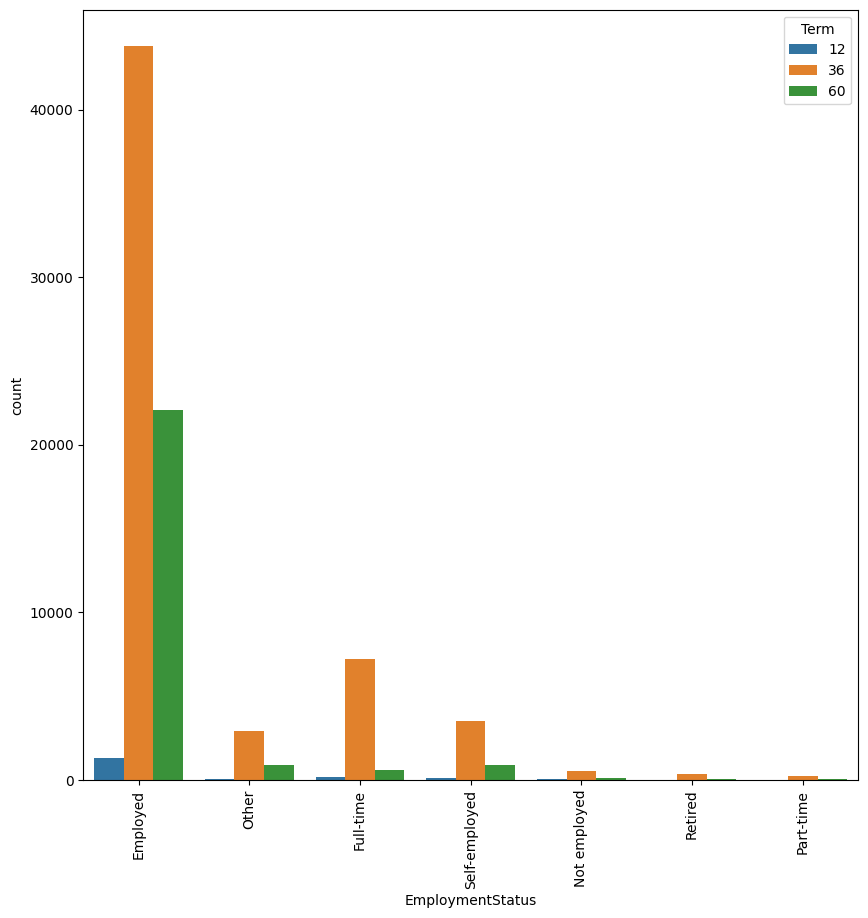

In [27]:
plt.figure(figsize=(10,10))
sb.countplot(data=df_selected, x='EmploymentStatus', hue='Term')
plt.xticks(rotation=90);

Observations:

Interestingly, all employment statuses are associated with the 36-month loan term. This finding indicates that regardless of the employment status of the borrowers (whether employed, self-employed, not employed, full-time, part-time, or retired), the 36-month term is the most preferred option for their loans. This consistency in loan term choice across employment categories suggests that the 36-month term is widely considered as a favorable and practical duration for borrowers from diverse employment backgrounds.

## V. Multivariate Exploration

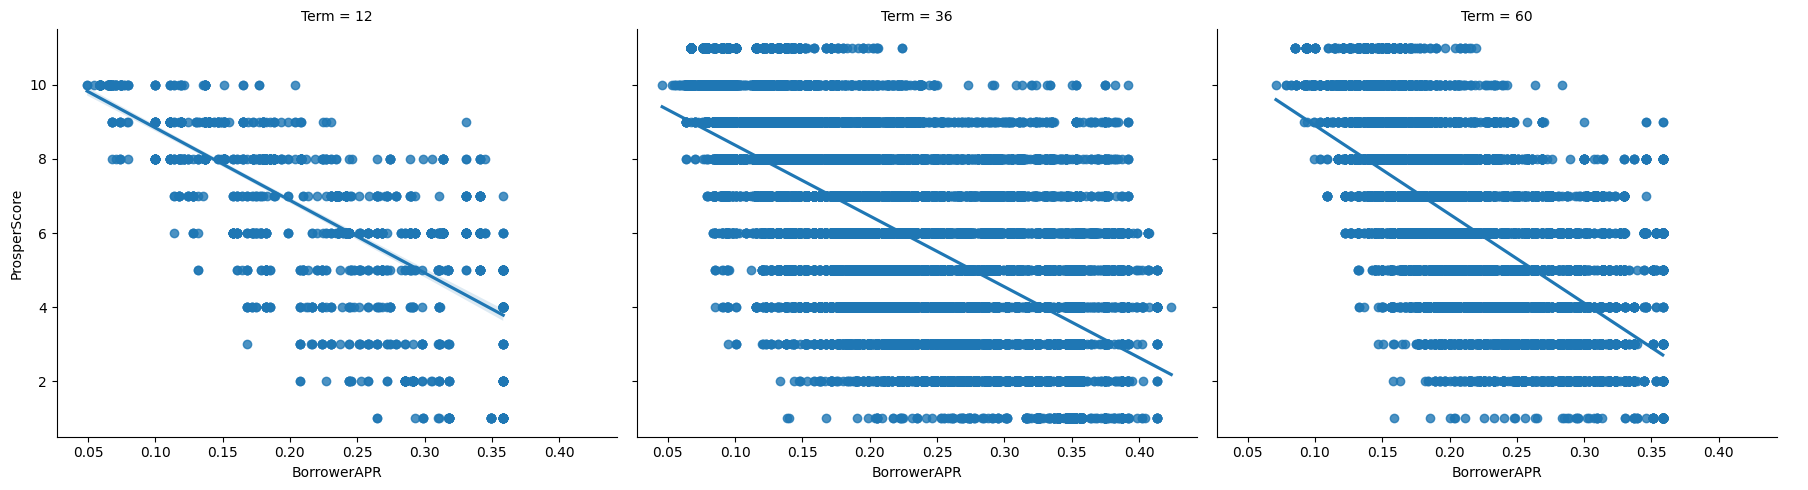

In [28]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_selected, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'BorrowerAPR', 'ProsperScore');
g.add_legend();

Observations:

For the 12-month loan term, there is an interesting trend regarding the Annual Percentage Rate (APR) concerning Prosper Scores:

- APR below 0.20: When the APR is below 0.20, there is a clear inverse relationship between the Prosper Score and the APR. Higher Prosper Scores are associated with lower APRs. However, it's worth noting that not all listings with a Prosper Score of 1 have APRs below 0.20.

- APR greater than 0.20: On the other hand, when the APR exceeds 0.20, all the listings have Prosper Scores less than 8, and some even have a Prosper Score of 1. This suggests that borrowers with lower Prosper Scores are more likely to have higher APRs when opting for a 12-month loan term.

When analyzing the 60-month loan term, distinct trends emerge based on Borrower Annual Percentage Rate (APR) and Prosper Scores:

- Borrower APR below 0.15: In this range, a clear relationship is observed, wherein higher Prosper Scores correspond to lower Borrower APRs. Borrowers with higher Prosper Scores tend to receive more favorable APRs, indicating that their creditworthiness positively influences the loan terms.

- Borrower APR greater than 0.15: For APRs exceeding 0.15, the distribution of Prosper Scores appears to be relatively even across the board. All listings in this range have Prosper Scores less than 8, with some even having a Prosper Score of 1. This implies that, regardless of Prosper Score, borrowers seeking loans with APRs above 0.15 are subject to similar lending terms.

Overall, the 60-month term presents interesting patterns in Borrower APR and Prosper Scores, with significant implications for loan approval and interest rates.

## VI. Conclusion

The analysis conducted in this study unveils a nuanced tapestry of borrower behaviors and lending practices within the studied platform. Through univariate analysis, the prevalence of loan terms, distribution of APR, and the significance of employment and borrower categories are illuminated. The bivariate exploration delves deeper into the relationships between borrower categories and their corresponding APRs and Prosper Scores, providing insights into creditworthiness disparities. The multivariate investigation underscores the complex interplay between APR, Prosper Scores, and loan terms, suggesting that different borrower profiles may lead to distinct lending outcomes.

Ultimately, this analysis not only sheds light on the intricate nature of lending decisions but also emphasizes the vital role that factors such as borrower categories, employment status, and credit scores play in shaping loan terms and interest rates. As lending practices evolve and financial landscapes continue to transform, these insights serve as a valuable foundation for understanding borrower preferences, credit risk assessment, and the dynamics that underpin the borrowing ecosystem.



In [53]:
df_selected.to_csv('Loan_cleaned.csv')